<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Tapete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tapete de Tapete de Sierpinski**


 *José Claudinei Ferrreira*
 
 *Universidade Federal de Alfenas (UNIFAL-MG)*

Este texto traz uma possibilidade de construção do [Tapete de Sierpinski](https://pt.wikipedia.org/wiki/Tapete_de_Sierpinski).

A construção aqui apresentada usa argumentos de [Geometria Analitica](https://pt.wikipedia.org/wiki/Geometria_anal%C3%ADtica) e [Álgebra Linear](https://pt.wikipedia.org/wiki/%C3%81lgebra_linear).

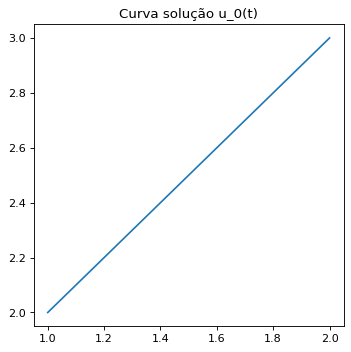

In [ ]:
import math  # Para usar comandos específicos de matemática.

from matplotlib import pyplot as plt

x1 = [1,2]
y1 = [2,3]

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(x1, y1, '-')
plt.title("Curva solução u_0(t)")
plt.show()

Considere o segmento da figura anterior, ligando os pontos $u_0=(1,2)$ e $u_1=(2,3)$, por exemplo. 

Vamos pensar nesse segmento como se fosse a imagem de uma função $u_0(t)$, sendo $u_0:[0,1]\to \mathbb{R}^2$. 

<font color=blue> Podemos ver esse segmento como o trajeto ligando os pontos $u_0$ e $u_1$, por meio de poligonais. 

<font color=green> Você pode imaginar isso em dimensão maior?!

Agora considere o vetor $v=u_1-u_0=(1,1)$.

In [ ]:
import numpy as np # Para lidar com vetores e matrizes.

u0=np.array([1,2])
u1=np.array([2,3])
v=u1-u0
v

array([1, 1])

Podemos usar esse vetor para determinar dois outros pontos no segmento, de tal forma a dividí-lo em três partes de mesmo comprimento.

Para isso vamos usar o vetor $v/3=(1/3,1/3)$. 

Teremos os pontos $u_2=u_0+v/3$ e $u_3=u_0+2v/3$.

u2=[1.33333333 2.33333333]

u3=[1.66666667 2.66666667]


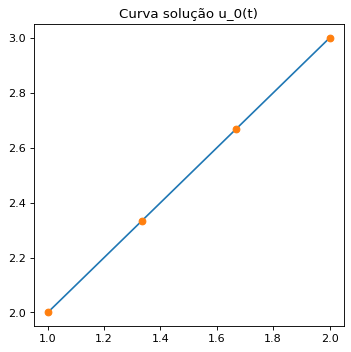

In [ ]:
u2=u0+v/3
u3=u0+2*v/3
print(f'u2={u2}')
print()
print(f'u3={u3}')
pontos=np.transpose(np.array([u0,u2,u3,u1]))

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], '-')
plt.plot(pontos[0], pontos[1], 'o')
plt.title("Curva solução u_0(t)")
plt.show()

<font color=blue> Podemos ver esses três segmentos como o trajeto ligando os pontos $u_0$ e $u_1$, por meio de poligonais, passando pelos outros dois pontos $u_2$ e $u_3$, na ordem $u_0,\,u_2,\,u_3,\, u_1$.

Agora vamos retirar a parte do meio do segmento (ou o segmento menor do meio) e substituí-lo por segmentos que formam um retângulo, no meio do trajeto entre $u_0$ e $u_1$ (veja as próximas duas figuras).

Uma forma de fazer essa construção é utilizar o vetor $v/3$, ou seja, somas e rotações desse vetor. Vamos usar também [matrizes de rotação](https://pt.wikipedia.org/wiki/Matriz_de_rota%C3%A7%C3%A3o) de ângulo $\theta$ nesse processo. 

Lembramos que, no nosso caso de interesse, esse tipo de matriz é da forma 
$$M=\begin{bmatrix}cos(\theta)&sen(\theta)\\-sen(\theta)&\cos(\theta)\end{bmatrix}$$

In [ ]:
def M(t): 
  m=np.array([[np.cos(t),np.sin(t)],[-np.sin(t), np.cos(t)]])
  return m

Fixando $\theta=\pi/2$, por exemplo, temos a matriz 
$$M=\begin{bmatrix}0&1\\-1&0\end{bmatrix},$$ que é a que usaremos até o final desse texto.

In [ ]:
Mt=M(np.pi/2)
Mt

array([[ 6.123234e-17,  1.000000e+00],
       [-1.000000e+00,  6.123234e-17]])

Vamos obter outros pontos, sendo 
$$u_4=u_2+\frac{1}{3}Mv,\quad u_5=u_4+\frac{1}{3}v,\quad u_6=u_3-\frac{1}{3}Mv,\quad u_7=u_6-\frac{1}{3}v.$$

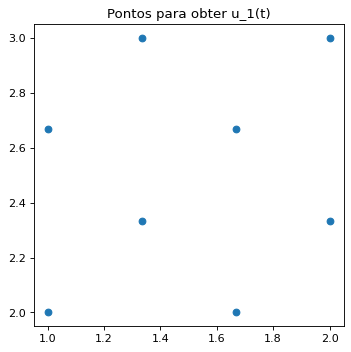

In [ ]:
w=v/3
u4=u2+Mt@w   # @ denota o produto usual de matrizes.
u5=u4+w
u6=u3-Mt@w
u7=u6-w

pontos=np.transpose(np.array([u0,u2,u4,u5,u3,u6,u7,u1]))
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.title("Pontos para obter u_1(t)")
plt.show()

Agora queremos uma poligonal ligando os pontos $u_0$ e $u_1$, e contendo esses pontos, na ordem $u_0,\,u_2,\,u_4,\, u_5,\,u_3,\, u_6,\, u_7,\,u_1$.

Para isso vamos precisar repetir alguns pontos, <font color=blue> para usar a função que produz os gráficos. A ordem fica $u_0,\,u_2,\,u_4,\, u_5,\,u_3,\, u_6,\, u_7,\,u_2,\,u_4,\, u_5,\,u_3,\,u_1$. 

<font color=green> A curva poligonal pode ser agora vista como uma curva $u_1(t)$.

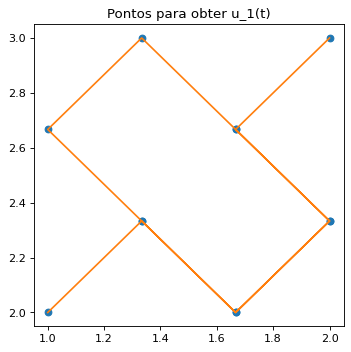

In [ ]:
pontos=np.transpose(np.array([u0,u2,u4,u5,u3,u6,u7,u2,u4,u5,u3,u1]))
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

#**Replicando o procedimento já descrito**

Esse processo de partir de um segmento de reta e construir uma curva poligonal, como a da figura anterior, pode ser repetido, usando agora cada segmento menor da poligonal.

Para fazer isso várias vezes e visualiar o processo, vamos definir uma função (em Phyton) que produz figura semelhante a anterior, com procedimento semelhente ao que usamos. 

Vamos chamar essa função de função de iteração.

In [ ]:
def itera(a,b): # Iteração base, dados os pontos a e b do plano.
  a=np.array(a)
  b=np.array(b)
  u=(b-a)/3
  v=np.array([-u[1],u[0]]) # rotação de 90 graus em u
  p=[]
  p.append(a)              # Iremos incluir cada ponto obtido como uma linha da matriz p, inciando com u0 e terminado com u1.         
  p.append([p[0][0]+u[0],p[0][1]+u[1]])
  p.append([p[1][0]+v[0],p[1][1]+v[1]])
  p.append([p[2][0]+u[0],p[2][1]+u[1]])
  p.append([p[3][0]-v[0],p[3][1]-v[1]])
  p.append([p[4][0]-v[0],p[4][1]-v[1]])
  p.append([p[5][0]-u[0],p[5][1]-u[1]])
  p.append([p[6][0]+v[0],p[6][1]+v[1]])
  p.append([p[7][0]+v[0],p[7][1]+v[1]])
  p.append([p[8][0]+u[0],p[8][1]+u[1]])
  p.append([p[9][0]-v[0],p[9][1]-v[1]])
  p.append(b)
  return p

Testando o retorno da função definida:

In [ ]:
itera(u0,u1)

[array([1, 2]),
 [1.3333333333333333, 2.3333333333333335],
 [1.0, 2.666666666666667],
 [1.3333333333333333, 3.0000000000000004],
 [1.6666666666666665, 2.666666666666667],
 [1.9999999999999998, 2.3333333333333335],
 [1.6666666666666665, 2.0],
 [1.3333333333333333, 2.3333333333333335],
 [1.0, 2.666666666666667],
 [1.3333333333333333, 3.0000000000000004],
 [1.6666666666666665, 2.666666666666667],
 array([2, 3])]

Para testar obtemos a figura o trajeto anterior:

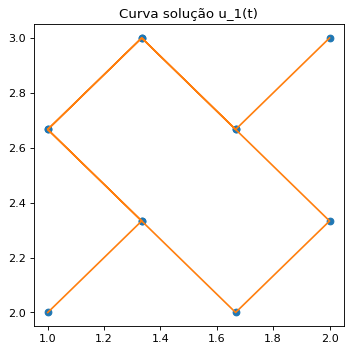

In [ ]:
pontos=np.transpose(itera(u0,u1))
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

Agora vamos replicar o processo em cada novo segmento obtido. 

Para isso vamos definir uma nova função para ir trocando os segmentos:

In [ ]:
def Sierpinski(a,b,m): # Replicação m vezes da iteração base, a e b são vetores com duas coordenadas.
   z=[]
   z.append(a)
   z.append(b)
   for i in range(0,m):
     q=[]
     q.append(a)
     for j in range(0,len(z)-1):
       qa=it(z[j],z[j+1])
       for l in range(1,len(qa)):
         q.append(qa[l])
     z=q
   return z

Vamos testar essa nova função, 

In [ ]:
Sierpinski([1,2],[2,3],0)

[[1, 2], [2, 3]]

In [ ]:
w=Sierpinski([1,2],[2,3],1)

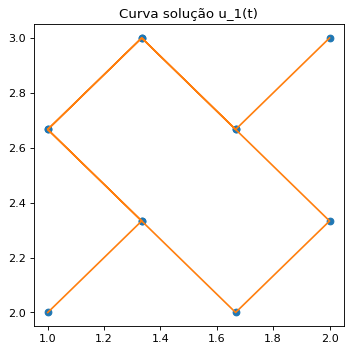

In [ ]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

No que segue vamos retirar as marcas dos pontos nos gráficos:

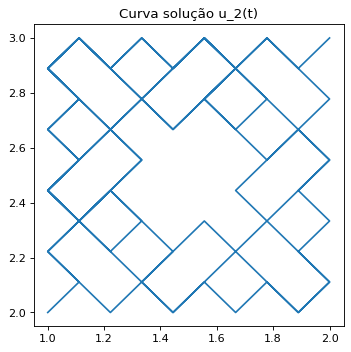

In [ ]:
w=Sierpinski([1,2],[2,3],2)
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_2(t)")
plt.show()

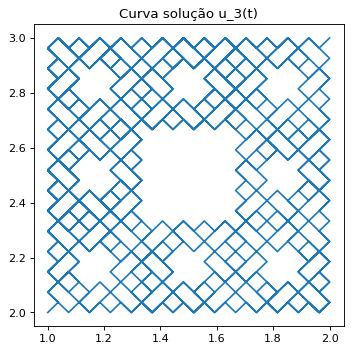

In [ ]:
w=Sierpinski([1,2],[2,3],3)
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_3(t)")
plt.show()

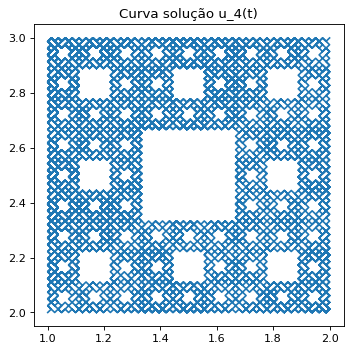

In [ ]:
w=Sierpinski([1,2],[2,3],4)
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_4(t)")
plt.show()

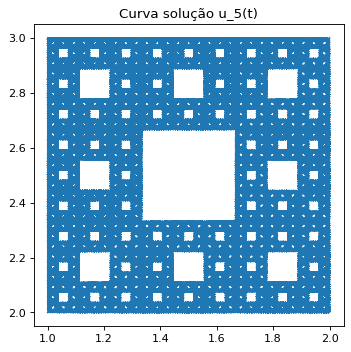

In [ ]:
w=Sierpinski([1,2],[2,3],5)
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_5(t)")
plt.show()

#**Generalizações**

Você pode adaptar o código aqui apresentado, e os argumentos, para construir outras curvas poligonais, como a curva [floco de neve de Koch](https://pt.wikipedia.org/wiki/Curva_de_Koch).
Veja um exemplo em linguagem R nesse [link](https://www.mycompiler.io/view/GnvWvrL).

Vamos apresentar rápidamente uma possível construção de uma imagem conhecida como [triângulo de Sierpinski](https://pt.wikipedia.org/wiki/Tri%C3%A2ngulo_de_Sierpinski).

Primeiro escolhemos um segmento definido, por exemplo, pelos pontos $u_0=(0,1)$ e $u_1=(1,2)$:

z=[[0 1]
 [1 2]]


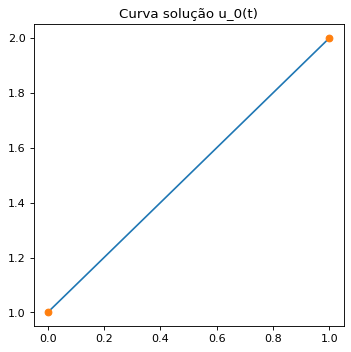

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x=np.array([0,1])
y=np.array([1,2])
z=np.transpose(np.array([x,y]))
print(f'z={z}')

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(z[0],z[1],'-')
plt.plot(z[0],z[1], 'o')
plt.title("Curva solução u_0(t)")
plt.show()

Como fizemos no exemplo anterior, definimos a forma de ir alterando cada parte do segmento para obter uma curva poligonal:

In [ ]:
def iterat(x,y,sinal):
  x=np.array(x)
  y=np.array(y)
  u=y-x
  t=sinal*(np.pi/3)
  M=np.array([[np.cos(t),np.sin(t)],[-np.sin(t),np.cos(t)]]) # Matriz de rotação.
  p=np.zeros((4,2))
  p[0]=x
  p[1]=p[0]+M@u/2
  p[2]=p[1]+u/2
  p[3]=y
  return p

Vejamos como fica a alteração, em cada parte da curva:

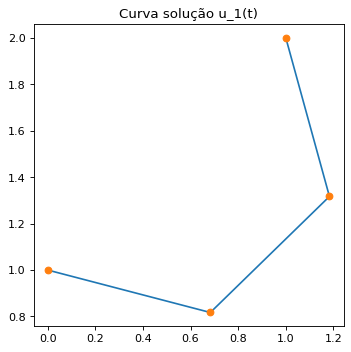

In [ ]:
sinal=1
z1=np.transpose(iterat(x,y,sinal))

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(z1[0],z1[1],'-')
plt.plot(z1[0],z1[1], 'o')
plt.title("Curva solução u_1(t)")
plt.show()

Alterando o sinal na matriz de rotação  <font color=blue> (que aqui é de ânglulo $\theta=\pi/3$) <font color=black> obtemos:

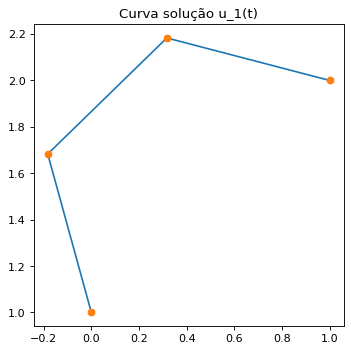

In [ ]:
sinal=-1
z2=np.transpose(iterat(x,y,sinal))

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(z2[0],z2[1],'-')
plt.plot(z2[0],z2[1], 'o')
plt.title("Curva solução u_1(t)")
plt.show()

Vamos agora definir a função que irá repetir o processo em cada novo segmento obtido. <font color=blue> Agora vamos alterar a rotação em alguns segmentos:

In [ ]:
def Sierpinskit(a,b,m): # Replicação m vezes da iteração base, a e b são vetores com duas coordenadas.
   sinal=1
   z=[]
   z.append(a)
   z.append(b)
   for i in range(0,m):
     q=[]
     q.append(a)
     for j in range(0,len(z)-1):
       qa=iterat(z[j],z[j+1],sinal)
       sinal=-sinal
       for l in range(1,len(qa)):
         q.append(qa[l])
     z=q
   return z

Vamos testar a nossa função:

In [ ]:
w=Sierpinskit(x,y,1)
w

[array([0, 1]),
 array([0.6830127, 0.8169873]),
 array([1.1830127, 1.3169873]),
 array([1., 2.])]

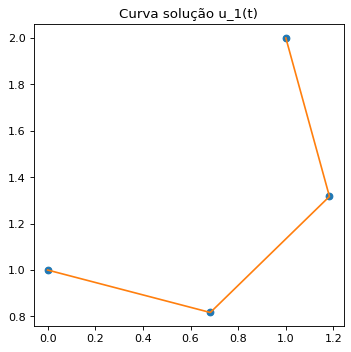

In [ ]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

In [ ]:
w=Sierpinskit(x,y,2)

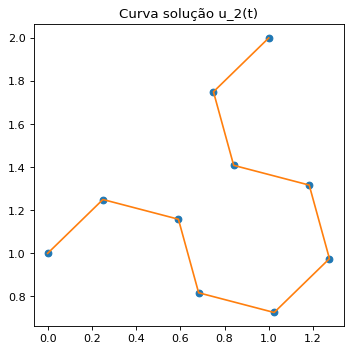

In [ ]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_2(t)")
plt.show()

In [ ]:
w=Sierpinskit(x,y,3)

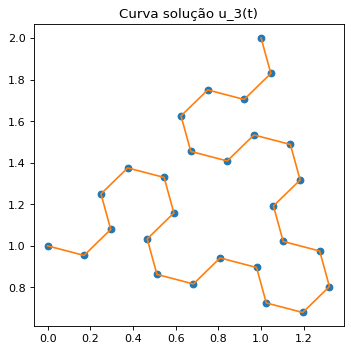

In [ ]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_3(t)")
plt.show()

In [ ]:
w=Sierpinskit(x,y,4)

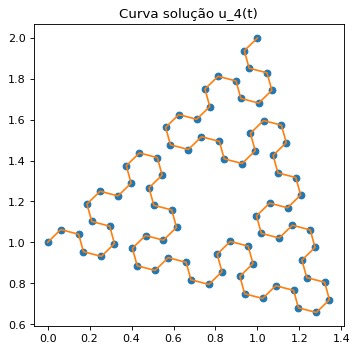

In [ ]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_4(t)")
plt.show()

In [ ]:
w=Sierpinskit(x,y,5)

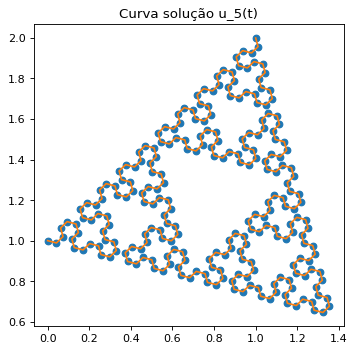

In [ ]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_5(t)")
plt.show()

No que segue vamos retirar os pontos dos gráficos:

In [ ]:
w=Sierpinskit(x,y,7)

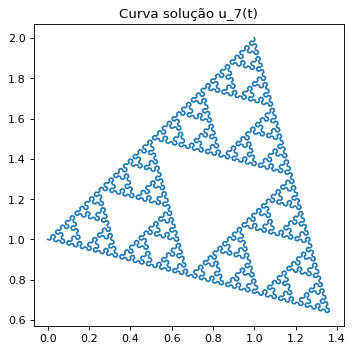

In [ ]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_7(t)")
plt.show()

In [ ]:
w=Sierpinskit(x,y,9)

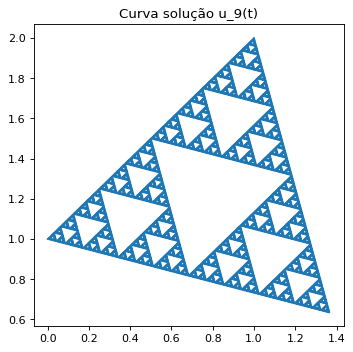

In [ ]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_9(t)")
plt.show()

#**Referências**


1. FERREIRA, J. C.; JULIO, R. S. [O problema do cachorro e do coelho: uma perseguição a partir de produções de significados.](https://periodicos.ufjf.br/index.php/ridema/article/view/38516) Revista de Investigação e Divulgação em Educação Matemática , [S. l.], v. 6, n. 1, 2022.

2. STEWART, J. Cálculo: volume 2. São Paulo: Cengage Learning, 2013.

3. FERREIRA, J. C. [Quando os Métodos de Euler e de Newton coincidem.](https://rmu.sbm.org.br/wp-content/uploads/sites/27/2021/03/3-Quandos-os-m%C3%A9todos-de-Eules-e-Newton-coinciden.pdf) Revista Matemática Universitária, v.1, 2021.

#**Animação do processo de construção da imagem fractal (tapete)**

Para visualizar animação clique no link Open in Colab no início da página.

In [ ]:
w=Sierpinski([1,2],[2,3],3)

from matplotlib.animation import FuncAnimation
from IPython import display

Figure = plt.figure()
 
# creating a plot
lines_plotted = plt.plot([])    
 
line_plotted = lines_plotted[0]
 
plt.xlim(1,2) 
 
plt.ylim(2,3)  

# function takes frame as an input
def AnimationFunction(i):
  if (11^pot)*i<len(w): 
    plt.plot(x3[:(11^pot)*i],y3[:(11^pot)*i])
  elif (11^pot)*i==len(w):      
    plt.plot(x3,y3)
  else:      
    plt.plot(x2,y2)
     
anim_created = FuncAnimation(Figure, AnimationFunction, frames=math.trunc(len(w)/(11^pot))+7, interval=50)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
 
# good practice to close the plt object.
plt.close()